In [8]:
import json, os
i = 16
directory = os.getcwd()
monpremierex = json.load(open(f"{directory}/input/tcl{i}/tcl{i}.json", "r"))
monpremierex_output = json.load(open(f"{directory}/output/tcl{i}/tcl{i}.json", "r"))

In [9]:
print(monpremierex)

{'name': 'tcl16', 'input_path': 'tcl/input/tcl16', 'output_path': 'tcl/output/tcl16', 'working_dir': 'tcl/input/tcl16', 'initial_temperature': 18.543029519249025, 'coefDeltaTemp': 0.0638364985025267, 'coefConso': 1.0, 'puissanceMin': 0, 'puissanceMax': 7.227916992171558, 'temperature_max': 21.793959931701252, 'temperature_min': 15.044836202362456, 'chroniqueTempExt': [-0.11505902653576505, 1.18625867241573, 0.5188928414003079, 0.199439316205461, -1.3856795756998086, 0.25138221133701755, 0.5539213779810456, -2.0223175251790795, -0.9185537831631951, 0.2926817751190744, 0.0088870079910257, 0.5161942576716974, -1.0508610764498243, -1.1772262284151152, 0.4058927035167925, 1.505825633191494, 1.7153946260385151, 1.4194184425760585, 1.5561610609873882, 1.9265336954193106, 3.552697481988674, 4.770381177578647, 3.663333216058002, 3.962957526984919, 5.387810019960842, 5.201559100953466, 6.449733208075951, 6.265416057910187, 7.7410899153530845, 6.097916469195814, 4.1739457105763815, 4.766919671047

In [10]:
temperature_max = monpremierex["temperature_max"]
temperature_min = monpremierex["temperature_min"]
coefDeltaTemp = monpremierex["coefDeltaTemp"]
electricity_cost = monpremierex["electricity_cost"]
coefConso = monpremierex["coefConso"]
initial_temperature = monpremierex["initial_temperature"]
chroniqueTempExt = monpremierex["chroniqueTempExt"]
puissanceMin = monpremierex["puissanceMin"]
puissanceMax = monpremierex["puissanceMax"]
load = monpremierex_output["load"]


In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
T = 48
temp_profile = np.zeros(T)
temp_profile[0] = initial_temperature
temp_min_liste =  [temperature_min for k in range(T)]
temp_max_liste =  [temperature_max for k in range(T)]
for t in range(1,T):
    temp_profile[t] = temp_profile[t - 1] + load[t] * coefConso*0.5 + 0.5*coefDeltaTemp*(chroniqueTempExt[t-1]-temp_profile[t-1])

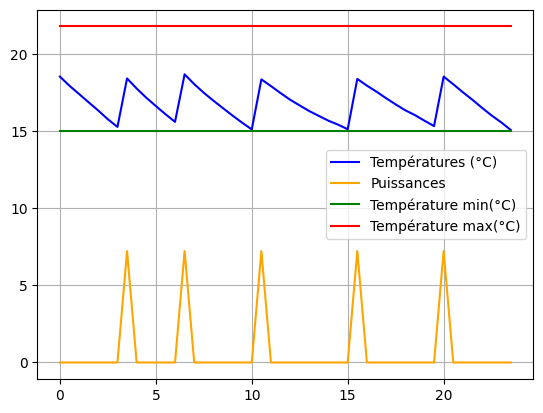

In [13]:
temps = [k/2 for k in range(48)]
plt.plot(temps, temp_profile, label='Températures (°C)', color='blue', marker='')
plt.plot(temps, load, label='Puissances', color='orange', marker='')
plt.plot(temps, temp_min_liste, label='Température min(°C)', color='green', marker='')
plt.plot(temps, temp_max_liste, label='Température max(°C)', color='red', marker='')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
facture_totale=0
for i in range(4):
    tcl_i = json.load(open(f"{directory}/output/tcl{i+1}/tcl{i+1}.json", "r"))
    facture_totale+=tcl_i["cost"]
print(facture_totale)

3.2644579995384007
